# L'efficience des marchés financiers

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
import quandl
cle_API = 
quandl.ApiConfig.api_key = cle_API

La théorie des cycles réels (*business cycle theory*) devrait se traduire par des cycles similaires en finance.

Problématique : existe-t-il des cycles ou des schémas expliquant le comportement des marchés financiers, les liant à l'économie réelle ?

Première perspective : Cela devrait être le cas, indiquant un fonctionnement normal

Seconde perspective : Un marché efficace devrait au contraire être imprévisible.

## La marche aléatoire des prix

La clé de la compréhension des marchés efficients réside dans le fait que les acteurs du marchés sont motivés par une décision immédiate pour bénéficier d'un état futur:
Si un schéma / cycle / etc. indique que le prix d'une action va augmenter dans les prochain jours ou mois, les acteurs financiers vont acheter cette action pour bénéficier de la hausse de prix. Tant que le prix de l'action sera inférieur à la valeur actualisée prévue, il sera intéressant de l'acheter.

Résultat : le prix de l'action augmente jusqu'à la valeur actualisée prévue par le marché. 
La valeur de l'actif contient donc toutes les attentes des acteurs du marché concernant le futur.

Le prix actuel est donc le produit de toutes les informations disponibles (et de leur inteprétation) de la part des acteurs du marché. Le prix peut donc varier uniquement suivant une nouvelle information.
Un prix prévisible signifierait donc une information prévisible : ce qui est incompatible avec le concept d'information. Si une nouvelle information est prévisible, alors ce n'est pas une nouvelle information.

Les prix devraient donc suivre une marche aléatoire, ou *random walk* : chaque pas est un phénomène aléatoire, indépendant du précédent, et d'espérance nulle.

$$X_{{t}}=X_{{t-1}}+\epsilon _{{t}}, \quad \epsilon _{{t}}\ \sim {\mathcal  {N}}(0,1)$$

Les rendements sont donc imprévisibles (indépendants des rendements précédents) et d'espérance nulle. Pour être précis, ils ne sont pas tout a fait d'espérance nulle : ils intègrent le cout de l'argent et le risque systémique, ce qui les rend globalement positifs.

Des rendements aléatoires et imprévisibles seraient donc le résultat d'un marché composé d'investisseurs intelligents se situant en situation de concurrence parfaite en ce qui concerne la recherche de l'information et la traduction de cette information en termes de prévisions de prix.

Le caractère aléatoire (ou imprévisible) des prix signifie en effet deux choses :

- toute l'information disponible sur le prix a déjà été intégrée dans le prix de l'actif (1) et ce de manière correcte (2)

Ou, de manière équivalente :

- le marché est tellement concurrentiel que le temps de traitement (1) et l'erreur d'interprétation (2) de toute nouvelle information approche zéro.

L'hypothèse que les prix reflètent déjà toute l'information disponible s'appelle l'hypothèse d'efficience des marchés financiers, ou *efficient market hypothesis* (EMH).

Exemple : l'effet sur les rendements de l'annonce d'une tentative de rachat.

![merge](figures/merge.png)
Source: Keown, Arthur J., and John M. Pinkerton. “Merger Announcements and Insider Trading Activity: An Empirical Investigation.” The Journal of Finance, vol. 36, no. 4, 1981, pp. 855–869. Mise en page: Bodie, Zvi. Investments. Tata McGraw-Hill Education, 2009.

- Avant l'annonce: fuite de l'information avant l'annonce, avec un impact relativement faible à cause du faible nombre d'insiders et le reste d'incertain concernant la décision.
- Le jour de l'annonce : mise à jour brutale de la valeur de l'actif, alors que le rachat n'a pas eu lieu, simplement été annoncé.
- Après l'annonce : pas d'évolution du prix, l'information a été intégrée immédiatement, y compris l'amplitude de la prime liée au rachat (*takeover premium*).

## Degrés d'efficience

Il existe plusieurs degré de l'hypothèse d'efficience des marchés financiers:

- la forme faible de l'hypothèse consiste à dire que les prix contiennent déjà toute l'information que l'on peut obtenir des données produites par le marché : prix passés, volume d'échange, taux d'intérêts, etc.  
- la forme semi-forte étend l'hypothèse à toute l'information publique sur les actifs.
- la forme forte étend l'hypothèse à toute l'information, même privée.

La forme faible de l'hypothèse aurait pour conséquence que toute **l'analyse technique** (*technical analysis*), serait inefficace. L'analyse technique consiste à détecter des schémas dans les variations de prix, ce qui permettrait de prédire les variations futures. Cette théorie s'appuie sur des éléments fondamentaux aussi bien que comportementaux. Les partisans de l'analyse technique avancent l'argument que le marché n'est pas efficient car les mécanismes de retour à l'équilibre efficaces ne sont pas quasi-immédiats et s'opèrent de manière prévisible. Ils se basent également sur des éléments cognitifs et comportementaux. La grande partie des calculs de l'analyse technique utilise les données du marché, facilement accessibles, pour calculer des indicateurs tels que les moyennes mobiles, les tendances, les niveaux de résistance, etc.

Exercice : à l'aide de la méthode [rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html), calculer une moyenne mobile sur 10 et 50 périodes de trading pour l'action de votre choix. Représenter les trois courbes (les deux moyennes mobiles et l'actif) sur le même graphique.

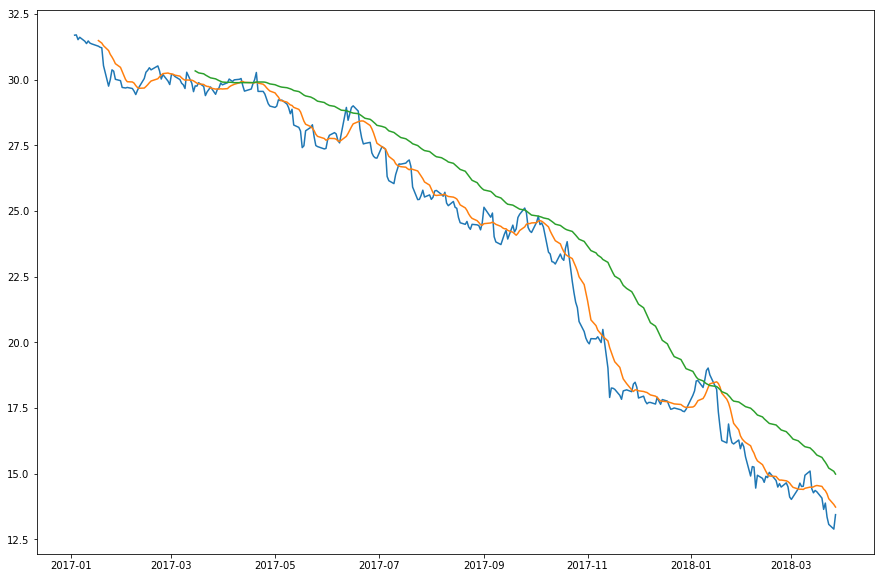

In [6]:
actif = quandl.get('WIKI/GE', start_date = '2017-01-01',
column_index = 4)

plt.plot(actif);
plt.plot(actif.rolling(10).mean());
plt.plot(actif.rolling(50).mean());

La forme semi-forte condamnerait une bonne partie de **l'analyse fondamentale** qui utilise les données économiques de l'entreprise pour valoriser les actifs et investir en fonction du différentiel entre la valorisation obtenue et la capitalisation boursière. L'hypothèse semi-forte suppose en effet que toute cette information publique est déjà refletée dans les prix, et qu'il s'agit d'une valorisation correcte. 
La seule manière de réaliser des profits est donc de produire une meilleure analyse que le marché tout entier : on obtient alors un différentiel valorisation - capitalisation qui peut-être utilisé, en achetant ou en shortant l'actif. Cependant, un différentiel peut également être le signe d'une erreur ou d'une prise en compte partielle des informations... Est-il possible d'être meilleur que le marché ?

## Une perspective à l'équilibre

Grossman, Sanford J., and Joseph E. Stiglitz. “On the Impossibility of Informationally Efficient Markets.” The American Economic Review, vol. 70, no. 3, 1980, pp. 393–408. JSTOR, JSTOR, www.jstor.org/stable/1805228.

A l'équilibre, l'information  n'est pas *complètement* contenue dans le prix des actifs : elle est contenue dans la mesure où il n'est plus rentable pour un agent de procéder à des recherches supplémentaires pour réaliser un gain lié au différentiel évoqué plus haut.

C'est un concept difficile à chiffrer, à moins de se situer dans un modèle théorique simplifié comme dans le papier de Grossman et Stiglitz. Cependant l'intuition aide à comprendre que nous ne nous situons par parfaitement sur un marché efficient, et que le marché peut donc réaliser des erreurs: simplement il est trop coûteux pour un agent (ou pour un groupe d'agents) d'améliorer l'efficience en recherchant des informations supplémentaires.

En résumé, à l'équilibre, le marché n'est pas tout à fait efficient et vous pourriez trouver des opportunités de profit, mais cela coûterait plus cher (que cela ne rapporterait) de les débusquer.

## Estimer l'effet d'une information

Pour chiffrer l'effet d'une information sur les rendements d'un actif, il faut parvenir à différencier le rendement "normal", c'est-à-dire le rendement qu'aurait eu l'actif sans l'information, et le rendement "anormal", lié à l'apparition de l'information.

Une méthode pour parvenir à différencier ces deux effets est d'utiliser le CAPM (ou un modèle à plusieurs facteurs comme le modèle Fama-French). Le "rendement anormal" ou *abnormal return* suit une version simplifiée du CAPM a un facteur:

$$e_t = r_t - (a + br_{m_t})$$
Ce qui s'obtient en réalisant la régression linéaire:
$$r_t = a + br_{m_t} + e_t$$

Exercice : Choisir un actif dont une information déterminante a été rendue publique et a eu un impact sur le cours de l'action. Evaluer l'impact de l'information.

1. Télécharger les données de l'actif
2. Télécharger les données d'un index représentant le *marché*
3. Procéder à la régression linéaire du modèle $r_t = a + br_{m_t} + e_t$
4. Récupérer le terme d'erreur
5. Représenter $e_t$ 

Correction

                            OLS Regression Results                            
Dep. Variable:                  Actif   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     36.02
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           2.94e-09
Time:                        00:40:06   Log-Likelihood:                 1172.1
No. Observations:                 812   AIC:                            -2340.
Df Residuals:                     810   BIC:                            -2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.002     -0.490      0.6

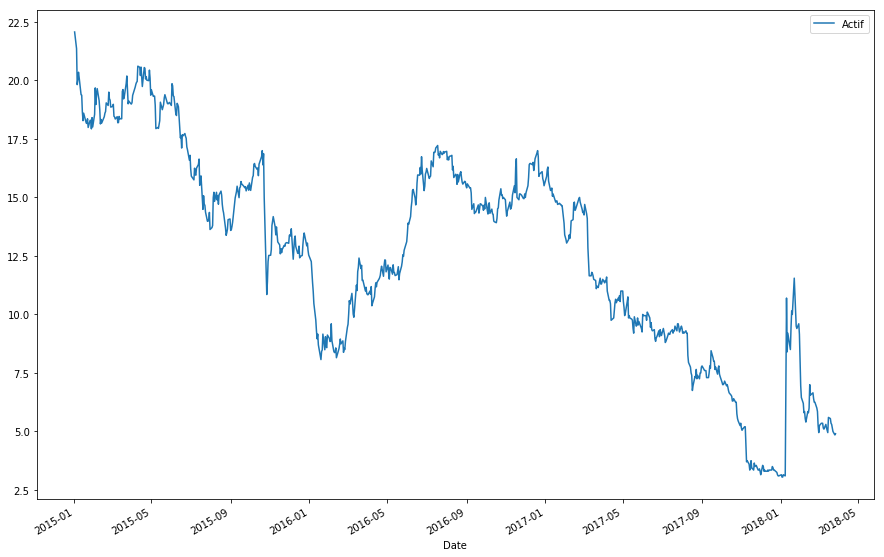

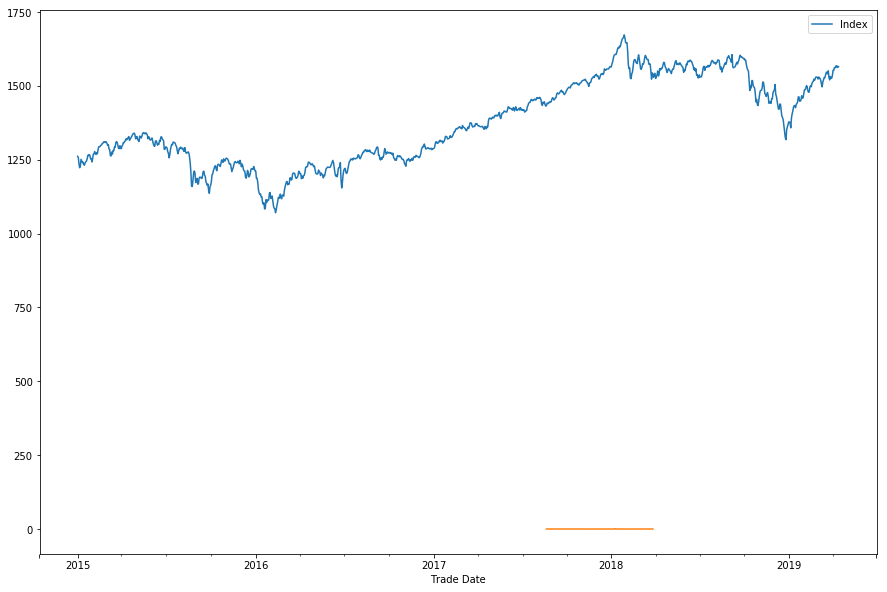

In [7]:
debut = '2015-01-01'
frequence = 'daily'

actif = quandl.get('WIKI/KODK', start_date = debut, column_index = 4,
collapse=frequence)
actif.columns = ['Actif']
actif.plot()

index = quandl.get('NASDAQOMX/NQGI', start_date = debut, column_index = 1, collapse=frequence)
index.columns = ['Index']
index.plot()

donnees = pd.concat([actif.pct_change(), index.pct_change()], axis=1)
donnees.drop(donnees.head(1).index, inplace=True)
donnees = donnees.dropna()
donnees.tail(20)

X = donnees['Index']
X = sm.add_constant(X)
y = donnees['Actif']

model = sm.OLS(y, X).fit()
retour_anormal = model.resid

print(model.summary())

model.resid.tail(150).plot();

Un concept complémentaire est le rendement anormal cumulé, ou *cumulative abnormal return* : il s'agit simplement de la somme cumulée des retours anormaux sur une période donnée.

Exercice : Trouver la méthode python qui permet de calculer une somme cumulée sur un DataFrame, et l'appliquer sur le DataFrame constitué des 150 dernières périodes de l'actif.

Correction

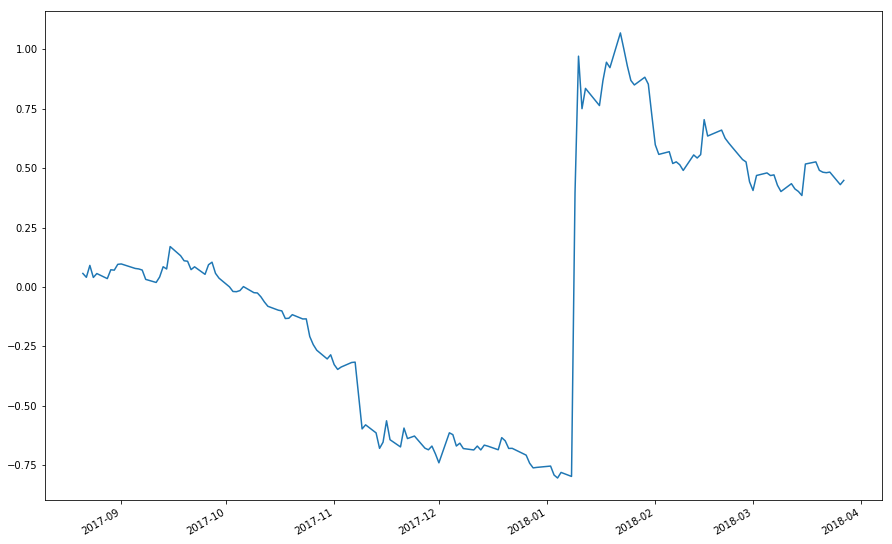

In [9]:
model.resid.tail(150).cumsum().plot();

## Tests d'efficience

### Forme faible

Les tests de la forme faible de l'EMH consistent à détecter d'éventuelles tendances dans les prix.
Plusieurs études sont parvenues à détecter des violations de cette hypothèse, révélant :

- des corrélations temporelles positives à court-terme, significatives mais trop faibles / prévisibles pour pouvoir générer des revenus;
- des corrélations temporelles négatives à long-terme qui suggéreraient que le marché sur-réagit à certaines nouvelles. Néanmoins une autre explication possible serait un changement de prime de risque du marché, qui provoquerait une baisse des prix avant une reprise des rendements calibrés sur la nouvelles prime de risque, ce qui produirait un phénomène proche de la sur-réaction.

Une explication proposée pour concilier les deux phénomènes serait la surréaction à court terme (même consciente) lentement corrigée à long terme.

## Forme semi-forte

Si des données publiques constituent des prédicteurs de l'évolution des marchés, cela constituerait une violation de la forme semi-forte de l'EMH.

Plusieurs éléments on été avancés :

- un ratio cours sur bénéfices (*price-earning ratio*) faible;
- une faible capitalisation boursière;
- un ratio *book-to-market* faible;

La difficulté est que le rendement d'un portefeuille doit être analysé en l'ajustant en fonction de son risque : si l'on constitue un portefeuille qui a généré dans le passé des rendements supérieurs à ce que l'on pouvait attendre, il peut s'agir d'une preuve contre l'EMH mais également une mauvaise estimation du risque du portefeuille.

Ainsi, les éléments avancés précédemment pourraient également être porteurs de risques qui ne sont pas captés par le CAPM à un facteur, et donc sous-estimés: ils ont par contre été estimés de manière supérieure par les agents au cours des périodes de l'échantillon, et donc le rendement moyen était supérieur.

Un autre contre-argument en faveur de l'efficience des marchés financiers est le biais possible dans la recherche de facteurs passés. En recherchant des facteurs explicatifs au hasard, on finit toujours par en trouver un.
Plusieurs études montrent ainsi que parmi les biais avancés plus haut, seul le book-to-market semble persister de manière claire à partir des années 1990. S'agit-il d'une adaptation du marché à des anomalies passées, ou des anomalies statistiques qui se sont logiquement résorbées ?